In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from flair.models import TextClassifier
from flair.data import Sentence
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SpatialDropout1D
from keras import backend as K
from tensorflow.keras import models
from keras.layers import Bidirectional

Using TensorFlow backend.
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
def model_evaluation(real_v, pred_v):
    print(f"Accuracy sore: {accuracy_score(real_v, pred_v)}")
    print("Classification report:")
    print(classification_report(real_v, pred_v))
    cm = confusion_matrix(real_v, pred_v)
    print (f"Confusion matrix \n {cm}")



In [3]:
# Plot train/test loss and accuracy
def plotLoss(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [4]:
# Find longest tweet in sequences
def max_tweet(sequences):
    max_length = len(sequences[0])
    for i in range(1, len(sequences)):
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

In [5]:
df = pd.read_csv("final_dataset.csv")
df.head()

,original_text,preprocessed_text,length_text,not_tag_text,airline,airline_sentiment,negative_reason
0,@VirginAmerica What @dhepburn said.,@mention @mention say,22,say,Virgin America,neutral,NaN
1,@VirginAmerica plus you've added commercials t...,@mention plus add commercial experience tacky,46,plus add commercial experience tacky,Virgin America,positive,NaN
2,@VirginAmerica I didn't today... Must mean I n...,@mention today must mean need take another trip,48,today must mean need take another trip,Virgin America,neutral,NaN
3,@VirginAmerica it's really aggressive to blast...,@mention really aggressive blast obnoxious ent...,88,really aggressive blast obnoxious entertainme...,Virgin America,negative,Bad Flight
4,@VirginAmerica and it's a really big bad thing...,@mention really big bad thing,30,really big bad thing,Virgin America,negative,Can't Tell


In [6]:
new_df = df[df["airline_sentiment"]!="neutral"][['airline_sentiment','preprocessed_text']].copy()

In [7]:
encoder = LabelEncoder()
X = new_df['preprocessed_text']
y = encoder.fit_transform(new_df["airline_sentiment"])

# Embedding Layer

Il livello di incorporamento è definito come il primo livello nascosto di una rete. Deve specificare 3 argomenti:

Deve specificare 3 argomenti:

<li> input_dim: questa è la dimensione del vocabolario nei dati di testo. Ad esempio, se i tuoi dati sono codificati in interi su valori compresi tra 0 e 10, la dimensione del vocabolario sarebbe di 11 parole.
<li> output_dim: questa è la dimensione dello spazio vettoriale in cui verranno incorporate le parole. Definisce la dimensione dei vettori di output da questo livello per ogni parola. Ad esempio, potrebbe essere 32 o 100 o anche più grande. Prova diversi valori per il tuo problema.
<li> input_length: questa è la lunghezza delle sequenze di input, come definiresti per qualsiasi livello di input di un modello Keras. Ad esempio, se tutti i tuoi documenti di input sono composti da 1000 parole, questo sarebbe 1000.

In [8]:
# Convert training data into tensors to feed into neural net
# create tokenizer
t = Tokenizer()
t.fit_on_texts(X)

### Troviamo input_dim

In [9]:
# Find number of unique words in our tweets
vocab_size = len(t.word_index) + 1
vocab_size

7698

In [10]:
# integer encode everything
sequences = t.texts_to_sequences(X)

In [11]:
tweet_num = max_tweet(sequences)
tweet_num

24

Le sequenze hanno lunghezze diverse e Keras preferisce che gli input siano vettorializzati e che tutti gli input abbiano la stessa lunghezza

In [12]:
maxlen = tweet_num
padded_X = pad_sequences(sequences, padding='post', maxlen=maxlen)

Siamo ora pronti per definire il nostro livello di incorporamento come parte del nostro modello di rete neurale.

L'embedding ha un vocabolario di dimensione 8989 e una lunghezza di input di 18. 
Dobbiamo scegliere l'output_dim dell'embedding layer.

Il modello è un semplice modello di classificazione binaria. 
È importante sottolineare che l'output dal livello Embedding sarà di 18 vettori ciascuno di dimensione pari all'output_dim. 
Lo appiattiamo a un vettore a (scegliere dim) elementi per passare al livello di output Denso.

# LSTM CON EMBEDDING LAYER NO GLOVE

In [19]:
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size = 0.3, random_state = 0, stratify=y)

In [20]:
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100,input_length = tweet_num, trainable=False)

In [21]:
set(y_train)

{0, 1}

# MODELLO 1 (LSTM 64)

In [22]:
lstm_mod1 = Sequential()
lstm_mod1.add(embedding_layer)
lstm_mod1.add(LSTM(64, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_mod1.add(Dense(1, activation='sigmoid'))
lstm_mod1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_mod1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 100)           769800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 812,105
Trainable params: 42,305
Non-trainable params: 769,800
_________________________________________________________________


In [23]:
hist_1 = lstm_mod1.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs=40, batch_size=128)

Train on 5654 samples, validate on 2424 samples
Epoch 1/40
5654/5654 [==============================] - 4s 659us/sample - loss: 0.5535 - acc: 0.7888 - val_loss: 0.5187 - val_acc: 0.7904
Epoch 2/40
5654/5654 [==============================] - 2s 316us/sample - loss: 0.5070 - acc: 0.7973 - val_loss: 0.5072 - val_acc: 0.7904
Epoch 3/40
5654/5654 [==============================] - 2s 315us/sample - loss: 0.4995 - acc: 0.7978 - val_loss: 0.4944 - val_acc: 0.7904
Epoch 4/40
5654/5654 [==============================] - 2s 312us/sample - loss: 0.4910 - acc: 0.7961 - val_loss: 0.4842 - val_acc: 0.7904
Epoch 5/40
5654/5654 [==============================] - 2s 305us/sample - loss: 0.4848 - acc: 0.7975 - val_loss: 0.4763 - val_acc: 0.7904
Epoch 6/40
5654/5654 [==============================] - 2s 307us/sample - loss: 0.4719 - acc: 0.7964 - val_loss: 0.4683 - val_acc: 0.7904
Epoch 7/40
5654/5654 [==============================] - 2s 300us/sample - loss: 0.4582 - acc: 0.7985 - val_loss: 0.4481 - va

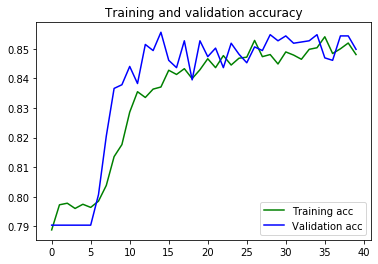

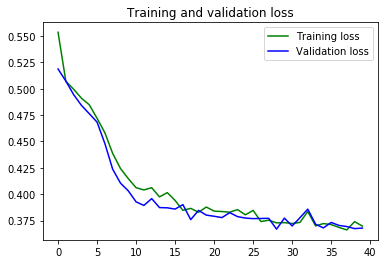

In [24]:
# Plot train/test loss and accuracy
plotLoss(hist_1)

In [25]:
# Find train and test f1
loss, accuracy = lstm_mod1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_mod1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8585
Testing Accuracy:  0.8467


In [26]:
y_pred = lstm_mod1.predict_classes(X_test)
model_evaluation(y_test, y_pred)

Accuracy sore: 0.8466647415535663
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2754
           1       0.70      0.43      0.54       709

    accuracy                           0.85      3463
   macro avg       0.79      0.69      0.72      3463
weighted avg       0.83      0.85      0.83      3463

Confusion matrix 
 [[2624  130]
 [ 401  308]]


# Using Pre-Trained GloVe Embedding

Caricare l'intero file di embedding di parole GloVe in memoria come un dizionario di array di parole da incorporare.

In [28]:
#dizionario pre-addestrato
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


Successivamente, dobbiamo creare una matrice di un embedding per ogni parola nel set di dati di train. Possiamo farlo enumerando tutte le parole univoche in Tokenizer.word_index e individuando il vettore del peso di incorporamento dall'incorporamento GloVe caricato.

Il risultato è una matrice di pesi solo per le parole che vedremo durante l'allenamento.

In [29]:
embedding_matrix = np.zeros((vocab_size, 100))

# fill in matrix
for word, i in t.word_index.items():  # dictionary
    embedding_vector = embeddings_index.get(word) # gets embedded vector of word from GloVe
    if embedding_vector is not None:
        # add to matrix
        embedding_matrix[i] = embedding_vector # each row of matrix

Ora possiamo definire il nostro modello, adattarlo e valutarlo come prima.

La differenza fondamentale è che lo strato di embedding può essere seminato con i pesi di embedding delle parole GloVe. Abbiamo scelto la versione a 100 dimensioni, quindi il livello di incorporamento deve essere definito con output_dim impostato a 100. Infine, non vogliamo aggiornare i pesi delle parole apprese in questo modello, quindi imposteremo l'attributo addestrabile per il modello su False .

In [30]:
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix],
                           input_length = tweet_num, trainable=False)

# MODELLO 1 GLOVE+LSTM 32

In [31]:
lstm_mod5 = Sequential()
lstm_mod5.add(embedding_layer)
lstm_mod5.add(LSTM(32, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_mod5.add(Dense(1, activation='sigmoid'))
lstm_mod5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_mod5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 24, 100)           769800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 786,857
Trainable params: 17,057
Non-trainable params: 769,800
_________________________________________________________________


In [32]:
hist_5 = lstm_mod5.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs=40, batch_size=128)

Train on 5654 samples, validate on 2424 samples
Epoch 1/40
5654/5654 [==============================] - 3s 475us/sample - loss: 0.5457 - acc: 0.7895 - val_loss: 0.4667 - val_acc: 0.7904
Epoch 2/40
5654/5654 [==============================] - 1s 255us/sample - loss: 0.4537 - acc: 0.7994 - val_loss: 0.4052 - val_acc: 0.7913
Epoch 3/40
5654/5654 [==============================] - 1s 248us/sample - loss: 0.4003 - acc: 0.8210 - val_loss: 0.3790 - val_acc: 0.8610
Epoch 4/40
5654/5654 [==============================] - 1s 232us/sample - loss: 0.3732 - acc: 0.8414 - val_loss: 0.3303 - val_acc: 0.8721
Epoch 5/40
5654/5654 [==============================] - 2s 281us/sample - loss: 0.3545 - acc: 0.8569 - val_loss: 0.3088 - val_acc: 0.8795
Epoch 6/40
5654/5654 [==============================] - 2s 318us/sample - loss: 0.3353 - acc: 0.8651 - val_loss: 0.2943 - val_acc: 0.8861
Epoch 7/40
5654/5654 [==============================] - 2s 302us/sample - loss: 0.3242 - acc: 0.8688 - val_loss: 0.2876 - va

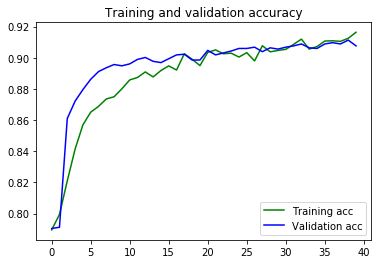

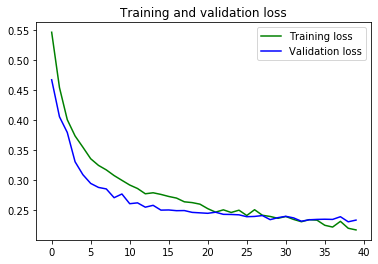

In [33]:
plotLoss(hist_5)

In [34]:
# Find train and test accuracy
loss, accuracy = lstm_mod5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_mod5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9229
Testing Accuracy:  0.8969


In [35]:
y_pred = lstm_mod5.predict_classes(X_test)
model_evaluation(y_test, y_pred)

Accuracy sore: 0.8969101934738666
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2754
           1       0.75      0.74      0.75       709

    accuracy                           0.90      3463
   macro avg       0.84      0.84      0.84      3463
weighted avg       0.90      0.90      0.90      3463

Confusion matrix 
 [[2583  171]
 [ 186  523]]
